<a href="https://colab.research.google.com/github/egipot/freeCodeCamp_tensorFlow/blob/main/freeCodeCamp_TensorFlow_4_classification_premadeEstimator_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From https://www.tensorflow.org/tutorials/estimator/premade -->
https://www.tensorflow.org/guide/keras/training_with_built_in_methods

# Training & evaluation with the built-in methods

In [1]:
import tensorflow as tf
import keras
from keras import layers

In [2]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [5]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
782/782 [==============================] - 3s 4ms/step - loss: 0.3355 - sparse_categorical_accuracy: 0.9055 - val_loss: 0.1776 - val_sparse_categorical_accuracy: 0.9502
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.1580 - sparse_categorical_accuracy: 0.9528 - val_loss: 0.1450 - val_sparse_categorical_accuracy: 0.9587


In [6]:
history.history

{'loss': [0.3354675769805908, 0.15798354148864746],
 'sparse_categorical_accuracy': [0.9055399894714355, 0.9528200030326843],
 'val_loss': [0.17762191593647003, 0.1450454294681549],
 'val_sparse_categorical_accuracy': [0.9502000212669373, 0.9587000012397766]}

In [7]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1475 - sparse_categorical_accuracy: 0.9572
test loss, test acc: [0.14751353859901428, 0.9571999907493591]
Generate predictions for 3 samples
1/1 [==============================] - 0s 95ms/step
predictions shape: (3, 10)


In [15]:
y_test.shape

(10000,)

In [16]:
x_test.shape

(10000, 784)

In [19]:
predictions

array([[8.2784209e-07, 1.3286109e-07, 1.1303973e-05, 2.2211992e-05,
        8.0046086e-10, 3.1987125e-05, 3.6341270e-11, 9.9991202e-01,
        1.4280964e-07, 2.1383197e-05],
       [2.4739173e-05, 1.7727099e-04, 9.9935144e-01, 4.0979771e-04,
        2.9687386e-10, 1.4470712e-06, 1.8975472e-05, 2.0172120e-09,
        1.6318225e-05, 2.0972304e-11],
       [1.6207785e-05, 9.9698985e-01, 2.5237544e-04, 1.2640169e-04,
        1.8120336e-04, 3.7819942e-04, 5.9449350e-05, 1.8749845e-03,
        1.0505775e-04, 1.6112694e-05]], dtype=float32)

In [11]:
import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [36]:
#https://www.geeksforgeeks.org/numpy-ndarray/?ref=lbp
y = np.zeros((3,10))

In [33]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
y.shape

(3, 10)

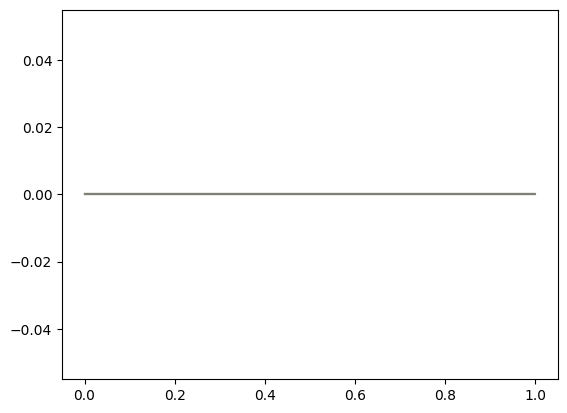

In [35]:
plt.plot(predictions,y )

In [39]:
#https://numpy.org/doc/stable/user/basics.creation.html

from numpy.random import default_rng
y2 = default_rng(42).random((3, 10))

In [40]:
y2

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735,
        0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594],
       [0.37079802, 0.92676499, 0.64386512, 0.82276161, 0.4434142 ,
        0.22723872, 0.55458479, 0.06381726, 0.82763117, 0.6316644 ],
       [0.75808774, 0.35452597, 0.97069802, 0.89312112, 0.7783835 ,
        0.19463871, 0.466721  , 0.04380377, 0.15428949, 0.68304895]])

In [41]:
y2.shape

(3, 10)

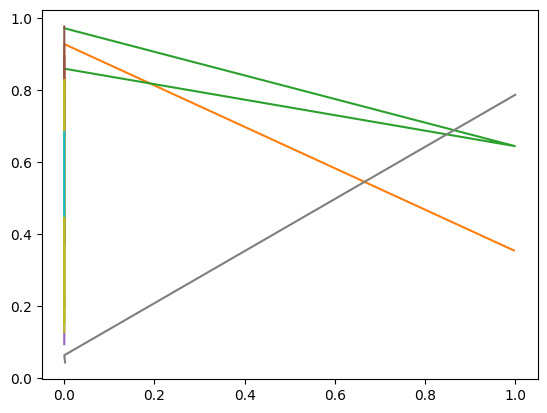

In [42]:
plt.plot(predictions, y2)

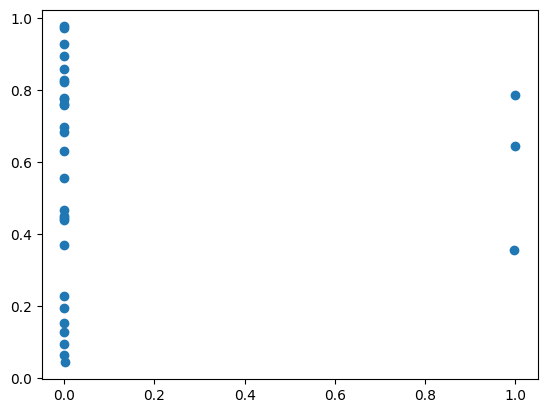

In [43]:
plt.scatter(predictions, y2)